In [19]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras import models, layers
import keras
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("temp_matrix (25).csv")
#check the data types
data.dtypes

timestamp        int64
date            object
time            object
day             object
irradiance     float64
temperature    float64
00             float64
01             float64
02             float64
03             float64
04             float64
05             float64
06             float64
07             float64
08             float64
09             float64
10             float64
11             float64
12             float64
13             float64
14             float64
15             float64
16             float64
17             float64
18             float64
19             float64
20             float64
21             float64
22             float64
23             float64
24             float64
25             float64
26             float64
27             float64
28             float64
29             float64
30             float64
31             float64
pmax           float64
SCC              int64
panel           object
dtype: object

In [5]:
#clean data:
#clean = data[data.panel=='clean']

#dusty data:
#dusty = data[data.panel=='dusty']

#seperating data into frames:

#These are columns that don't need to be normalized
data1 = data[['timestamp','date','time','day','panel']]

#everything else minus the timestamp column does need to be normalized
data2 = data.select_dtypes(include = ['float64','int64'])
data2 = data2.drop(columns=['timestamp'])

In [6]:
#these columns are broken sensors, need to be replaced with 0's:
#01,02,04,07,12,15,16,19,24,27,29,30
data2.update(data2[['01','02','04','07','12','15','16','19','24','27','29','30']].fillna(0))

In [7]:
#replacing the remainder NaN
#by default this will be a linear interpolation unless a different method is specified
new_data2 = data2.interpolate()

In [8]:
#concatinating the dataframes:
df = pd.concat([data1, new_data2], axis=1)
df

,timestamp,date,time,day,panel,irradiance,temperature,00,01,02,...,24,25,26,27,28,29,30,31,pmax,SCC
0,1555390800,2019-04-16,9:01:06 AM,Tuesday,clean,557.80,28.21,31.4630,0.0,0.0,...,0.0,26.0680,25.9360,0.0,26.6240,0.0,0.0,25.9125,8801.920,673
1,1555390800,2019-04-16,9:01:06 AM,Tuesday,dusty,557.80,28.21,27.7050,0.0,0.0,...,0.0,25.6480,25.8800,0.0,20.5490,0.0,0.0,25.9610,7964.932,630
2,1555394400,2019-04-16,10:01:16 AM,Tuesday,clean,787.00,33.99,45.5560,0.0,0.0,...,0.0,46.5070,47.6900,0.0,44.8900,0.0,0.0,47.0325,56452.320,4520
3,1555394400,2019-04-16,10:01:16 AM,Tuesday,dusty,787.00,33.99,46.6650,0.0,0.0,...,0.0,47.3960,48.3070,0.0,0.0000,0.0,0.0,45.7140,40853.528,4447
4,1555398000,2019-04-16,11:01:52 AM,Tuesday,clean,916.77,32.31,49.9210,0.0,0.0,...,0.0,51.5880,53.0250,0.0,49.3400,0.0,0.0,52.6700,61858.730,5299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3015,1567342800,2019-09-01,5:06:48 PM,Sunday,dusty,3.14,38.30,44.1390,0.0,0.0,...,0.0,43.3630,43.5190,0.0,0.0000,0.0,0.0,42.3010,7421.639,792
3016,1567346400,2019-09-01,6:07:32 PM,Sunday,clean,3.14,38.30,41.3485,0.0,0.0,...,0.0,40.7325,40.9625,0.0,18.9850,0.0,0.0,40.1580,1429.268,224
3017,1567346400,2019-09-01,6:07:32 PM,Sunday,dusty,3.14,38.30,38.5580,0.0,0.0,...,0.0,38.1020,38.4060,0.0,37.9700,0.0,0.0,38.0150,671.760,140
3018,1567350000,2019-09-01,7:08:16 PM,Sunday,clean,3.14,38.30,36.9515,0.0,0.0,...,0.0,36.5910,36.7505,0.0,36.6875,0.0,0.0,36.6725,0.000,1


In [9]:
#seperating the newly revised data into frames for the independent & dependent variables
#the colon indicates all rows, and '00':'31' indicates all the columns from 00 to 31

independent = df.loc[:,'00':'31'] 
dependent = df.loc[:,'pmax']

ind = independent.to_numpy()
ind[0].reshape(-1,4) #convert to 2d array

dep = dependent.to_numpy()
dep = dep.reshape(-1,1) 

#scale first
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler2 = MinMaxScaler()
ind = scaler.fit_transform(ind)
dep = scaler2.fit_transform(dep)

#print(ind)
#print(dep)

#apply map function to iterate through every element
ind1 = map(lambda x : x.reshape(-1,4), ind)


#convert back to an array from list
ind2 = list(ind1)
ind2 = np.array(ind2)

In [10]:
X_train,X_test,y_train,y_test,=train_test_split(ind2,dep,test_size=0.2,random_state=0)

In [11]:
X_train = X_train.reshape(X_train.shape[0], 8,4,1)
X_train

array([[[[0.74386462],
         [0.        ],
         [0.        ],
         [0.71303195]],

        [[0.        ],
         [0.71759791],
         [0.74086213],
         [0.        ]],

        [[0.        ],
         [0.71997857],
         [0.70542479],
         [0.73890308]],

        ...,

        [[0.        ],
         [0.6874533 ],
         [0.73593747],
         [0.68315341]],

        [[0.        ],
         [0.71666667],
         [0.72416837],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.6782059 ]]],


       [[[0.73063073],
         [0.        ],
         [0.        ],
         [0.67550617]],

        [[0.        ],
         [0.63285653],
         [0.65812649],
         [0.        ]],

        [[0.73928065],
         [0.59568557],
         [0.61952008],
         [0.69241902]],

        ...,

        [[0.73760886],
         [0.59599144],
         [0.64731159],
         [0.63232178]],

        [[0.        ],
       

In [12]:
X_test = X_test.reshape(X_test.shape[0], 8,4,1)
X_test[0]

array([[[0.48155826],
        [0.        ],
        [0.        ],
        [0.44751863]],

       [[0.        ],
        [0.25579382],
        [0.3222087 ],
        [0.        ]],

       [[0.4803232 ],
        [0.2506301 ],
        [0.24860586],
        [0.4475929 ]],

       [[0.        ],
        [0.38688111],
        [0.26929531],
        [0.        ]],

       [[0.        ],
        [0.26224521],
        [0.33084005],
        [0.        ]],

       [[0.49995548],
        [0.25536641],
        [0.33072179],
        [0.42229819]],

       [[0.        ],
        [0.25540077],
        [0.25919907],
        [0.        ]],

       [[0.50996348],
        [0.        ],
        [0.        ],
        [0.41834851]]])

In [13]:
y_train

array([[6.93578610e-01],
       [4.53858716e-01],
       [4.12162179e-01],
       ...,
       [6.98905042e-02],
       [3.58480307e-01],
       [4.96459581e-07]])

In [14]:
X_train = X_train.astype('float32')

X_test = X_test.astype('float32')



In [27]:
#Instantiate an empty model
model = Sequential()

# C1 Convolutional Layer
model.add(layers.Conv2D(6, kernel_size=(2, 2), strides=(1, 1), activation='tanh', input_shape=(8,4,1), padding="same"))

# S2 Pooling Layer
#model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))

# C3 Convolutional Layer
model.add(layers.Conv2D(16, kernel_size=(2, 2), strides=(1, 1), activation='tanh', padding='valid'))

# S4 Pooling Layer
#model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))

# C5 Fully Connected Convolutional Layer
model.add(layers.Conv2D(120, kernel_size=(2, 2), strides=(1, 1), activation='tanh', padding='valid'))

#Flatten the CNN output so that we can connect it with fully connected layers
model.add(layers.Flatten())

# FC6 Fully Connected Layer
model.add(layers.Dense(84, activation='tanh'))

#Output Layer with softmax activation
model.add(layers.Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=["acc"])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 8, 4, 6)           30        
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 3, 16)          400       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 6, 2, 120)         7800      
_________________________________________________________________
flatten_2 (Flatten)          (None, 1440)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 84)                121044    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 85        
Total params: 129,359
Trainable params: 129,359
Non-trainable params: 0
________________________________________________

In [28]:
hist = model.fit(x=X_train,y=y_train, epochs=10, batch_size= 10, validation_data=(X_test, y_test), verbose=1)

Train on 2416 samples, validate on 604 samples
Epoch 1/10
2416/2416 [==============================] - 1s 411us/step - loss: 0.0422 - acc: 0.0186 - val_loss: 0.0304 - val_acc: 0.0166
Epoch 2/10
2416/2416 [==============================] - 1s 353us/step - loss: 0.0323 - acc: 0.0219 - val_loss: 0.0299 - val_acc: 0.0199
Epoch 3/10
2416/2416 [==============================] - 1s 374us/step - loss: 0.0320 - acc: 0.0211 - val_loss: 0.0302 - val_acc: 0.0232
Epoch 4/10
2416/2416 [==============================] - 1s 360us/step - loss: 0.0314 - acc: 0.0199 - val_loss: 0.0297 - val_acc: 0.0199
Epoch 5/10
2416/2416 [==============================] - 1s 354us/step - loss: 0.0314 - acc: 0.0219 - val_loss: 0.0310 - val_acc: 0.0132
Epoch 6/10
2416/2416 [==============================] - 1s 354us/step - loss: 0.0305 - acc: 0.0211 - val_loss: 0.0287 - val_acc: 0.0199
Epoch 7/10
2416/2416 [==============================] - 1s 356us/step - loss: 0.0301 - acc: 0.0211 - val_loss: 0.0306 - val_acc: 0.0232
E

In [29]:
test_score = model.evaluate(X_test, y_test)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

604/604 [==============================] - 0s 53us/step
Test loss 0.0286, accuracy 2.32%


Text(0, 0.5, 'acc')

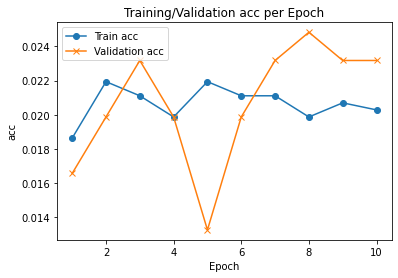

In [30]:
f, ax = plt.subplots()
ax.plot([None] + hist.history['acc'], 'o-')
ax.plot([None] + hist.history['val_acc'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train acc', 'Validation acc'], loc = 0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')

Text(0, 0.5, 'Loss')

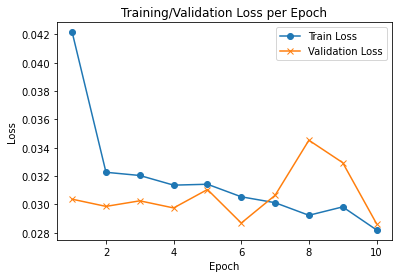

In [32]:
f, ax = plt.subplots()
ax.plot([None] + hist.history['loss'], 'o-')
ax.plot([None] + hist.history['val_loss'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train Loss', 'Validation Loss'], loc = 0)
ax.set_title('Training/Validation Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')